<a href="https://colab.research.google.com/github/NatashaKamami/Advanced_ML/blob/main/Retail_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
# Data Explotation libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline

# Data Encoding
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Clustering
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer

# Perform PCA for dimensionality reduction
from sklearn.decomposition import PCA


In [172]:
df = pd.read_csv('/content/Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [174]:
df.isnull().sum()/len(df)*100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


In [175]:
df.duplicated().sum()

5268

In [176]:
df.drop_duplicates(inplace=True)

In [177]:
df.dropna(subset=['Description'], inplace=True)
df.dropna(subset=['CustomerID'], inplace=True)

In [178]:
df.drop(columns=['InvoiceNo',"InvoiceDate"], inplace=True)

In [179]:
scaler = StandardScaler()
df[['Quantity', 'UnitPrice']] = scaler.fit_transform(df[['Quantity', 'UnitPrice']])

In [180]:
X = df[["Quantity", "UnitPrice"]]

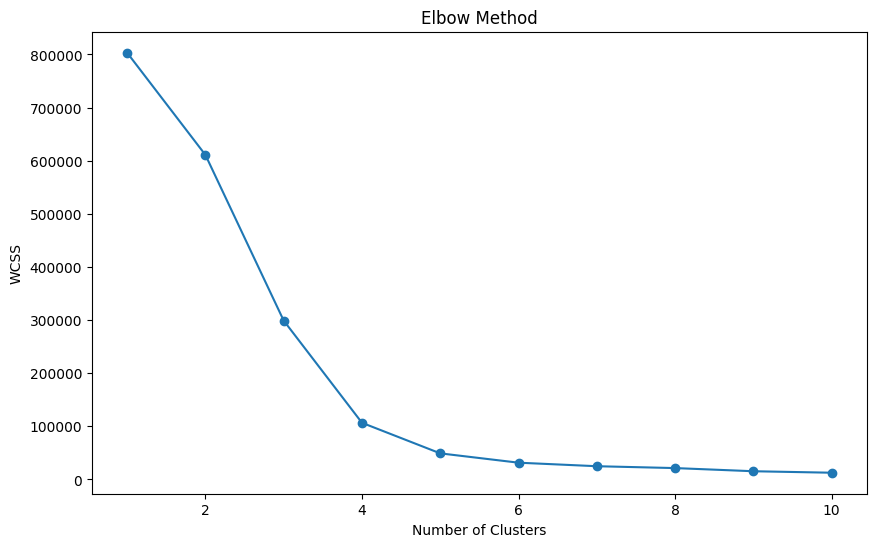

In [181]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



In [182]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Show the first few rows of the DataFrame with clusters
print(df.head())

  StockCode                          Description  Quantity  UnitPrice  \
0    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.024705  -0.013246   
1     71053                  WHITE METAL LANTERN -0.024705  -0.001205   
2    84406B       CREAM CUPID HEARTS COAT HANGER -0.016714  -0.010379   
3    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.024705  -0.001205   
4    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.024705  -0.001205   

   CustomerID         Country  Cluster  
0     17850.0  United Kingdom        0  
1     17850.0  United Kingdom        0  
2     17850.0  United Kingdom        0  
3     17850.0  United Kingdom        0  
4     17850.0  United Kingdom        0  


In [183]:
df["Cluster"].value_counts()

,count
Cluster,
0,401599
2,2
3,2
1,1


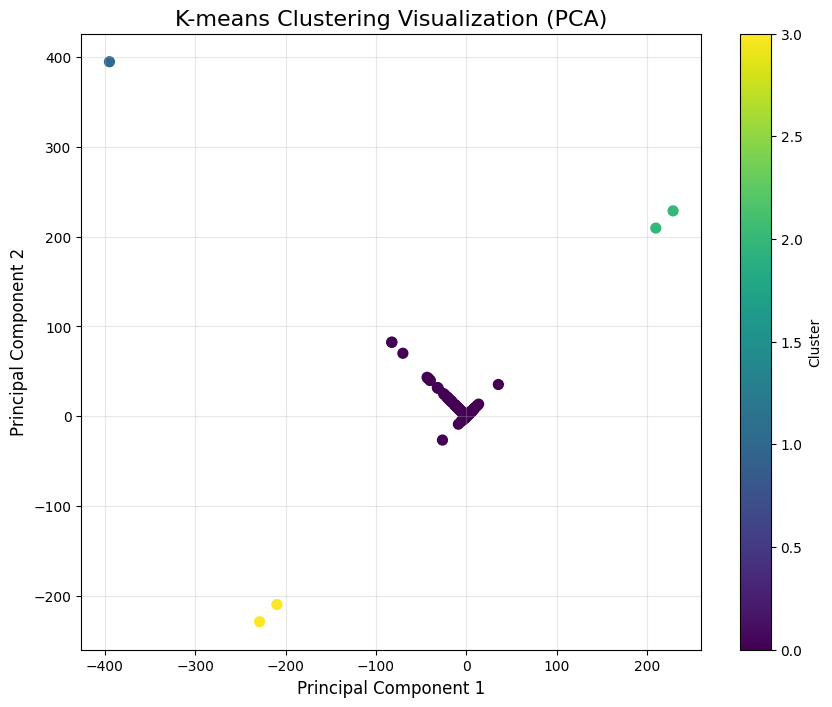

In [184]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize Clusters in 2D Space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering Visualization (PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)
plt.show()


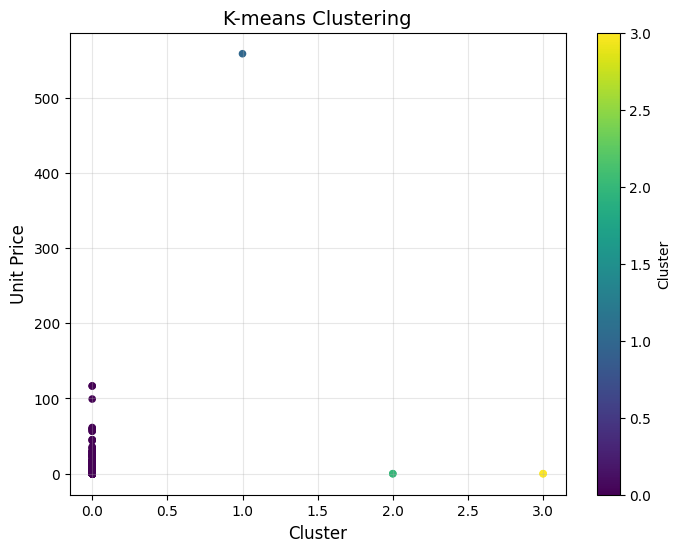

In [185]:
# Scatter plot of clusters based on birth year and income
plt.figure(figsize=(8, 6))

# Scatter plot with clusters identified by color
plt.scatter(df['Cluster'], df['UnitPrice'], c=df['Cluster'], cmap='viridis', s=20)

# Formatting the plot
plt.title('K-means Clustering', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Unit Price', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(alpha=0.3)
plt.show()
